Script for creating visualisation

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import mapclassify
import numpy as np

In [2]:
# load geometry data
vic_geo_df = gpd.read_file('../data/VIC_LOCALITY_POLYGON_shp.geojson')

In [3]:
vic_geo_df.head()

,LG_PLY_PID,DT_CREATE,DT_RETIRE,LGA_PID,VIC_LGA_sh,VIC_LGA__1,VIC_LGA__2,VIC_LGA__3,VIC_LGA__4,VIC_LGA__5,geometry
0,452,2017-09-08,None,VIC245,2017-09-08,None,FALLS CREEK ALPINE RESORT (UNINCORPORATED),FALLS CREEK ALPINE RESORT (UNINC),None,2,"POLYGON ((147.24172 -36.86703, 147.24202 -36.8..."
1,465,2017-09-08,None,VIC246,2017-09-08,None,MOUNT BULLER ALPINE RESORT (UNINCORPORATED),MOUNT BULLER ALPINE RESORT (UNINC),None,2,"POLYGON ((146.46042 -37.12999, 146.46062 -37.1..."
2,475,2017-09-08,None,VIC231,2017-09-08,None,CORANGAMITE SHIRE,CORANGAMITE,None,2,"POLYGON ((143.47180 -38.28086, 143.47117 -38.2..."
3,480,2017-09-08,None,VIC226,2017-09-08,None,KINGSTON CITY,KINGSTON,None,2,"POLYGON ((145.10925 -38.04438, 145.10912 -38.0..."
4,481,2017-09-08,None,VIC227,2017-09-08,None,FRANKSTON CITY,FRANKSTON,None,2,"POLYGON ((145.10531 -38.15533, 145.10556 -38.1..."


In [4]:
# load active cases data
df_all_dates = pd.read_csv('../data/all_dates.csv')

In [5]:
df_all_dates.head()

,lga,2020-06-14,2020-06-15,2020-06-16,2020-06-17,2020-06-18,2020-06-19,2020-06-20,2020-06-21,2020-06-22,...,2020-07-27,2020-07-28,2020-07-29,2020-07-30,2020-07-31,2020-08-01,2020-08-02,2020-08-03,2020-08-04,2020-08-05
0,ALPINE,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0.0,0,0,0,0
1,ARARAT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,1,1,1.0,1,1,1,1
2,BALLARAT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10,10,10,10,10,11.0,11,11,12,13
3,BANYULE,2.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,151,144,144,144,141,146.0,143,136,133,148
4,BASS COAST,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,2,2,3,4,5.0,4,4,3,4


In [23]:
vic_geo_df = pd.merge(vic_geo_df[['VIC_LGA__3', 'geometry']], df_all_dates[['lga', '2020-08-05']], how = 'inner', left_on = 'VIC_LGA__3', right_on = 'lga', sort = True)

In [24]:
vic_geo_df.head()

,VIC_LGA__3,geometry,lga,2020-08-05
0,ALPINE,"POLYGON ((147.33765 -37.02971, 147.33788 -37.0...",ALPINE,0
1,ARARAT,"POLYGON ((142.41911 -37.47345, 142.41891 -37.4...",ARARAT,1
2,BALLARAT,"POLYGON ((143.84322 -37.67028, 143.84303 -37.6...",BALLARAT,13
3,BANYULE,"POLYGON ((145.13566 -37.74089, 145.13561 -37.7...",BANYULE,148
4,BASS COAST,"POLYGON ((145.50141 -38.57222, 145.49637 -38.5...",BASS COAST,4


<AxesSubplot:>

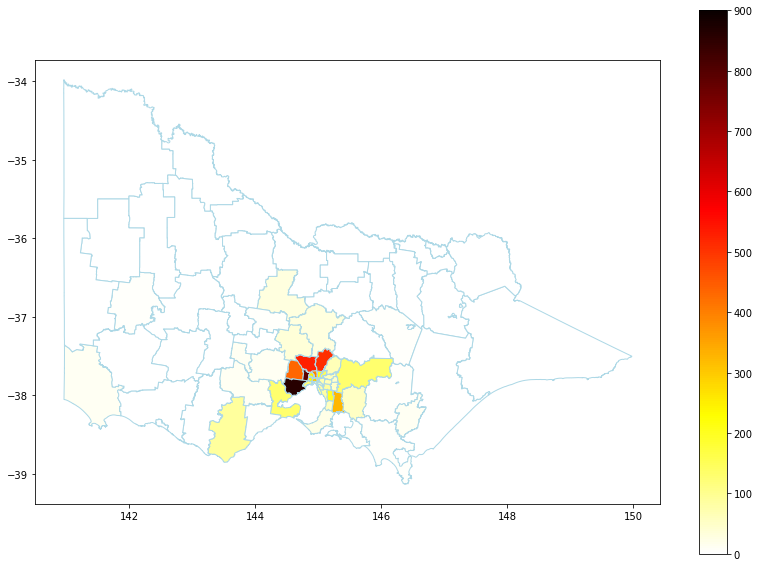

In [61]:
vic_geo_df.plot(figsize = (14,10), column = '2020-08-05', legend = True, 
                      cmap = 'hot_r', k = 20, vmin = 0, vmax = 900, edgecolor = 'lightblue')

now just map the melbourne lgas

In [9]:
melb_lgas = ['Banyule','Bayside','Boroondara','Brimbank','Cardinia','Casey','Darebin','Frankston','Glen Eira',
'Greater Dandenong','Hobsons Bay','Hume','Kingston','Knox','Manningham','Maribyrnong','Maroondah','Melbourne',
'Melton','Monash','Moonee Valley','Moreland','Mornington Peninsula','Nillumbik','Port Phillip','Stonnington',
'Whitehorse','Whittlesea','Wyndham','Yarra','Yarra Ranges']

In [10]:
melb_lgas = [lga.upper() for lga in melb_lgas]

In [28]:
melb_geo_df = vic_geo_df[vic_geo_df['lga'].isin(melb_lgas)]

In [29]:
melb_geo_df.head()

,VIC_LGA__3,geometry,lga,2020-08-05
3,BANYULE,"POLYGON ((145.13566 -37.74089, 145.13561 -37.7...",BANYULE,148
8,BAYSIDE,"POLYGON ((144.99705 -37.88387, 145.00104 -37.8...",BAYSIDE,98
10,BOROONDARA,"POLYGON ((145.00440 -37.80533, 145.00457 -37.8...",BOROONDARA,71
11,BRIMBANK,"POLYGON ((144.86944 -37.72219, 144.86383 -37.7...",BRIMBANK,791
14,CARDINIA,"POLYGON ((145.40064 -38.10820, 145.40063 -38.1...",CARDINIA,55


In [67]:
q20 = mapclassify.EqualInterval(np.linspace(0, 900, 100), k = 45)
q20

EqualInterval           

    Interval       Count
------------------------
[  0.00,  20.00] |     3
( 20.00,  40.00] |     2
( 40.00,  60.00] |     2
( 60.00,  80.00] |     2
( 80.00, 100.00] |     2
(100.00, 120.00] |     3
(120.00, 140.00] |     2
(140.00, 160.00] |     2
(160.00, 180.00] |     2
(180.00, 200.00] |     2
(200.00, 220.00] |     3
(220.00, 240.00] |     2
(240.00, 260.00] |     2
(260.00, 280.00] |     2
(280.00, 300.00] |     3
(300.00, 320.00] |     2
(320.00, 340.00] |     2
(340.00, 360.00] |     2
(360.00, 380.00] |     2
(380.00, 400.00] |     2
(400.00, 420.00] |     3
(420.00, 440.00] |     2
(440.00, 460.00] |     2
(460.00, 480.00] |     2
(480.00, 500.00] |     2
(500.00, 520.00] |     3
(520.00, 540.00] |     2
(540.00, 560.00] |     2
(560.00, 580.00] |     2
(580.00, 600.00] |     3
(600.00, 620.00] |     2
(620.00, 640.00] |     2
(640.00, 660.00] |     2
(660.00, 680.00] |     2
(680.00, 700.00] |     2
(700.00, 720.00] |     3
(720.00, 740.00] |     2

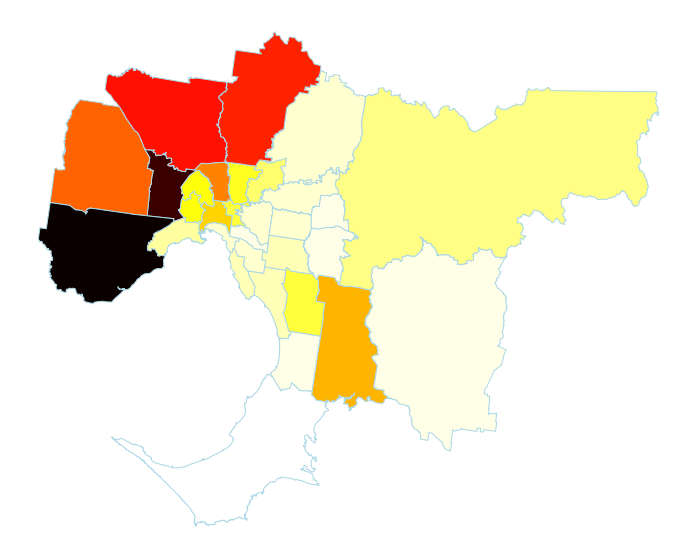

In [68]:
melb_geo_df.plot(figsize = (14,10), column = '2020-08-05', cmap = 'hot_r', scheme = 'userdefined', 
                 classification_kwds={'bins':q20.bins}, edgecolor = 'lightblue')
plt.axis('off')
plt.show()

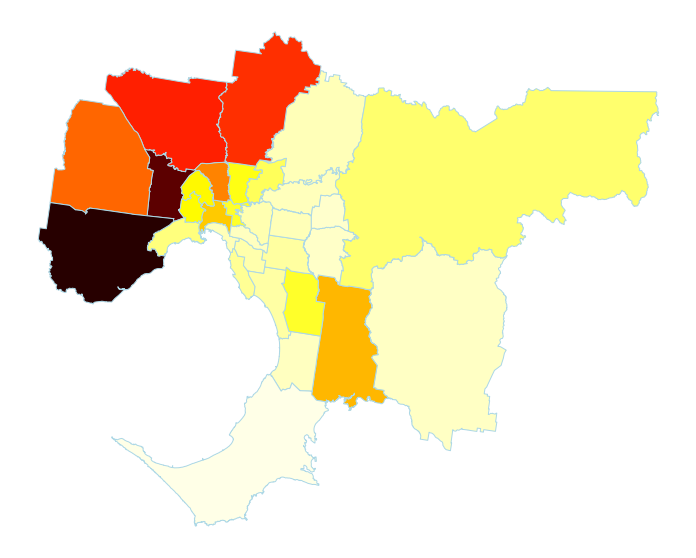

In [70]:
melb_geo_df.plot(figsize = (14,10), column = '2020-08-05', cmap = 'hot_r', k = 45, vmin = 0, vmax = 900, edgecolor = 'lightblue')
plt.axis('off')
plt.show()